In [1]:
# Import necessary libraries
import sys
sys.path.extend(["../../../"])
from src.para_voro import *
from src.para_voro_plots import *

# Create a sample dataset with 10 samples
np.random.seed(0)

In [2]:
# space dividing halfspaces
A = np.append(-normalize_vec(np.array([-1., -1.])), -np.linalg.norm([0.5, 0.5]))
B = np.append(-normalize_vec(np.array([1.0, 0.0])), 0.5)
C = np.append(-normalize_vec(np.array([0.0, 1.0])), 0.5)

In [3]:
def inside_halfspace(hs: np.ndarray, p: np.ndarray) -> bool:
    """
    Returns True if the point is inside the halfspace.
    """
    return hs[:-1] @ p + hs[-1] <= 0

In [4]:
def inside_halfspaces(hss: list, p: np.ndarray) -> bool:
    """
    Returns True if the point is inside the halfspaces in list.
    """
    return np.all([inside_halfspace(hs, p) for hs in hss])

In [5]:
label_colors = get_12_categorical_colors()

label_colors[6], label_colors[8] = label_colors[8], label_colors[6]  # swap one blue with yellow

label_colors = make_object_array(label_colors)

In [6]:
in_A = lambda x: inside_halfspaces([A, -B], x)
in_B = lambda x: inside_halfspaces([B, -C], x)
in_C = lambda x: inside_halfspaces([C, -A], x)

In [7]:
n_samples = 100
samples = np.random.random((n_samples, 2))

# samples = np.array([
#     [0.25, 0.25],
#     [0.75, 0.25],
#     [0.75, 0.75]
# ])

label_fn = lambda x: 0 if in_A(x) else (1 if in_B(x) else 2)

labels = np.array([
    label_fn(x) for x in samples
])

aabbox = np.array([
    [0, 1],
    [0, 1.0]
])

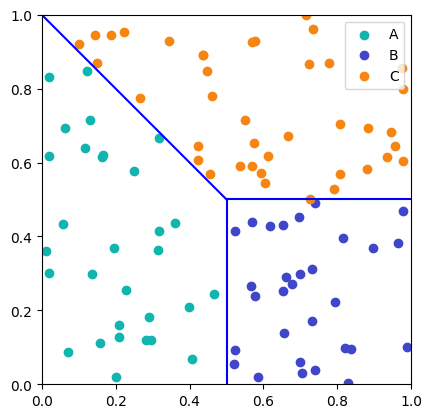

In [8]:
plt.close()

fig = plt.figure()
ax = fig.gca()

# plot gt
ax.plot([0.0, 0.5], [1.0, 0.5], c="blue")
ax.plot([0.5, 0.5], [0.0, 0.5], c="blue")
ax.plot([0.5, 1.0], [0.5, 0.5], c="blue")

for i, l in zip(range(3), "ABC"):
    selector = labels == i
    pp = samples[selector]
    ll = labels[selector]
    ax.scatter(pp[:, 0], pp[:, 1], c=label_colors[i], label=f"{l}")
ax.legend()

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_aspect("equal")

plt.show()


c:\Users\bauer\Desktop\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro_plots.py:89: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], color=colors, cmap='winter', s=5)


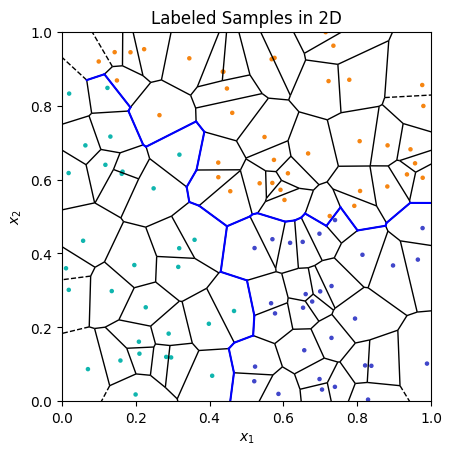

In [9]:
f = plot_data(samples, labels, aabbox, colors=label_colors[:3])

In [10]:
rv, rp = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox, return_original_ridge_point_indices=True)

c:\Users\bauer\Desktop\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro.py:334: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


c:\Users\bauer\Desktop\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro_plots.py:222: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], c=colors, cmap='winter', s=2**6)


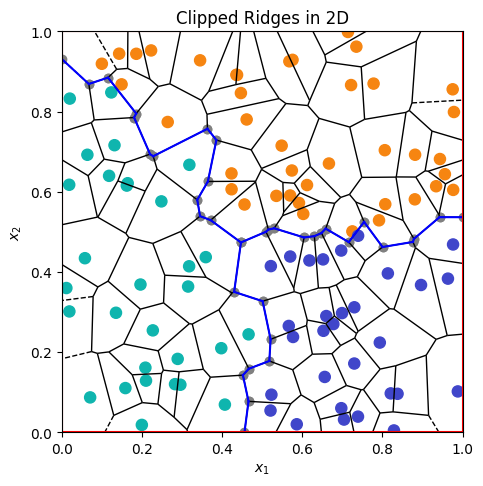

In [11]:
dim_names = ["$x_1$", "$x_2$"]
f = plot_ridges(rv, samples, labels, aabbox, False, dim_names=dim_names, colors=label_colors[:3], f=0.0)
f.gca().set_title("100 random samples labeled by ground truth region")
f.savefig("alg_err_100_samples.pdf", bbox_inches="tight")

In [12]:
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, rp)

In [13]:
bws = np.array([0.04, 0.04])
sample_points_min_max = compute_sample_points(clip_box=aabbox, bandwidths=bws, step_size=None)

In [14]:
sample_points_min_max

([array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
         0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
         0.9 , 0.94, 0.98]),
  array([0.02, 0.06, 0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42,
         0.46, 0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86,
         0.9 , 0.94, 0.98])],
 [array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
         0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
         0.88, 0.92, 0.96]),
  array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
         0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
         0.88, 0.92, 0.96])],
 [array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44,
         0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88,
         0.92, 0.96, 1.  ]),
  array([0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44,
         0.48, 0.52, 0.56, 0

In [15]:
ridge_based_para_sense_preparations_result = ridge_based_para_sense_preparations(ridge_vertices=rv,
                                                                                     bandwidths=bws,
                                                                                     clip_box=aabbox,
                                                                                     step_size=None,
                                                                                     sample_points_min_max=sample_points_min_max,
                                                                                     verbose=False)
    

In [16]:
_, dtc_ret = build_directed_transition_cubes(M_T, rv, sample_points_min_max=sample_points_min_max, 
                                                 ridge_based_para_sense_preparations_result=ridge_based_para_sense_preparations_result,
                                                 bandwidths=bws, clip_box=aabbox, step_size=None, n_proc=None, verbose=False)

In [17]:
sens_matrix_list = [d[0] for d in dtc_ret]

In [18]:
# sens_matrix_list = normalize_transition_matrix_by_bandwidth(sense_matrix_list=sens_matrix_list, bandwidths=bws)

In [19]:
gtsmx1 = np.zeros((3, 3, len(sample_points_min_max[0][0])))
gtsmx2 = np.zeros((3, 3, len(sample_points_min_max[0][1])))

mx1 = gtsmx1.shape[-1] // 2
mx2 = gtsmx2.shape[-1] // 2

# fill gt values
gtsmx1[0, 2, :mx1] = bws[0] * 1.0
gtsmx1[0, 2, mx1] = 0.5 * bws[0] * 1.0
gtsmx1[0, 1, mx1] = 0.5

gtsmx2[1, 2, mx2] = 0.5
gtsmx2[0, 2, mx2] = 0.5 * bws[1] * 1.0
gtsmx2[0, 2, mx2+1:] = 1.0 * bws[1]

ground_truth_sens_matrix_list = [gtsmx1, gtsmx2]

In [20]:
(np.abs(gtsmx1 - sens_matrix_list[0])).sum(), (np.abs(gtsmx2 - sens_matrix_list[1])).sum()

(np.float64(1.5080780868009829), np.float64(1.0430634861927763))

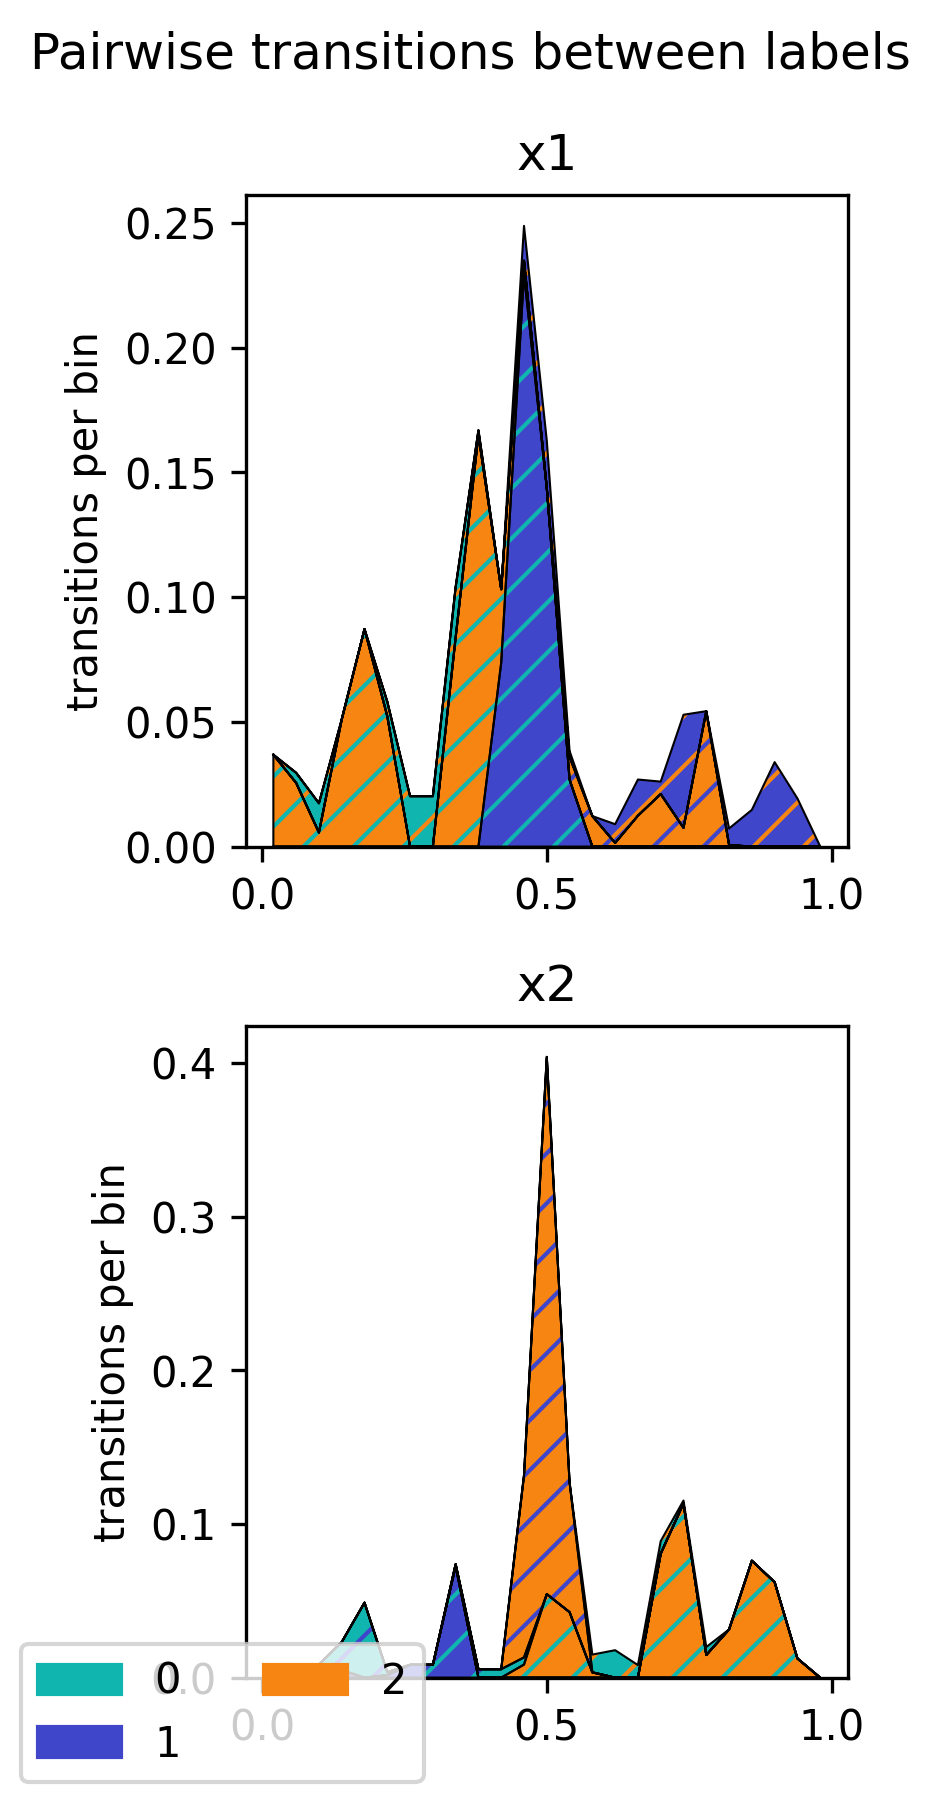

In [21]:
f = plot_sens_matrix_list(sample_points=sample_points_min_max[0], sens_matrix_list=sens_matrix_list, stack_plot_kwargs=dict(colors=label_colors[:3], hatch="//"), 
                          do_pairwise_labels=False, stackplot_color_hatch=True, stackplot_divider=True)

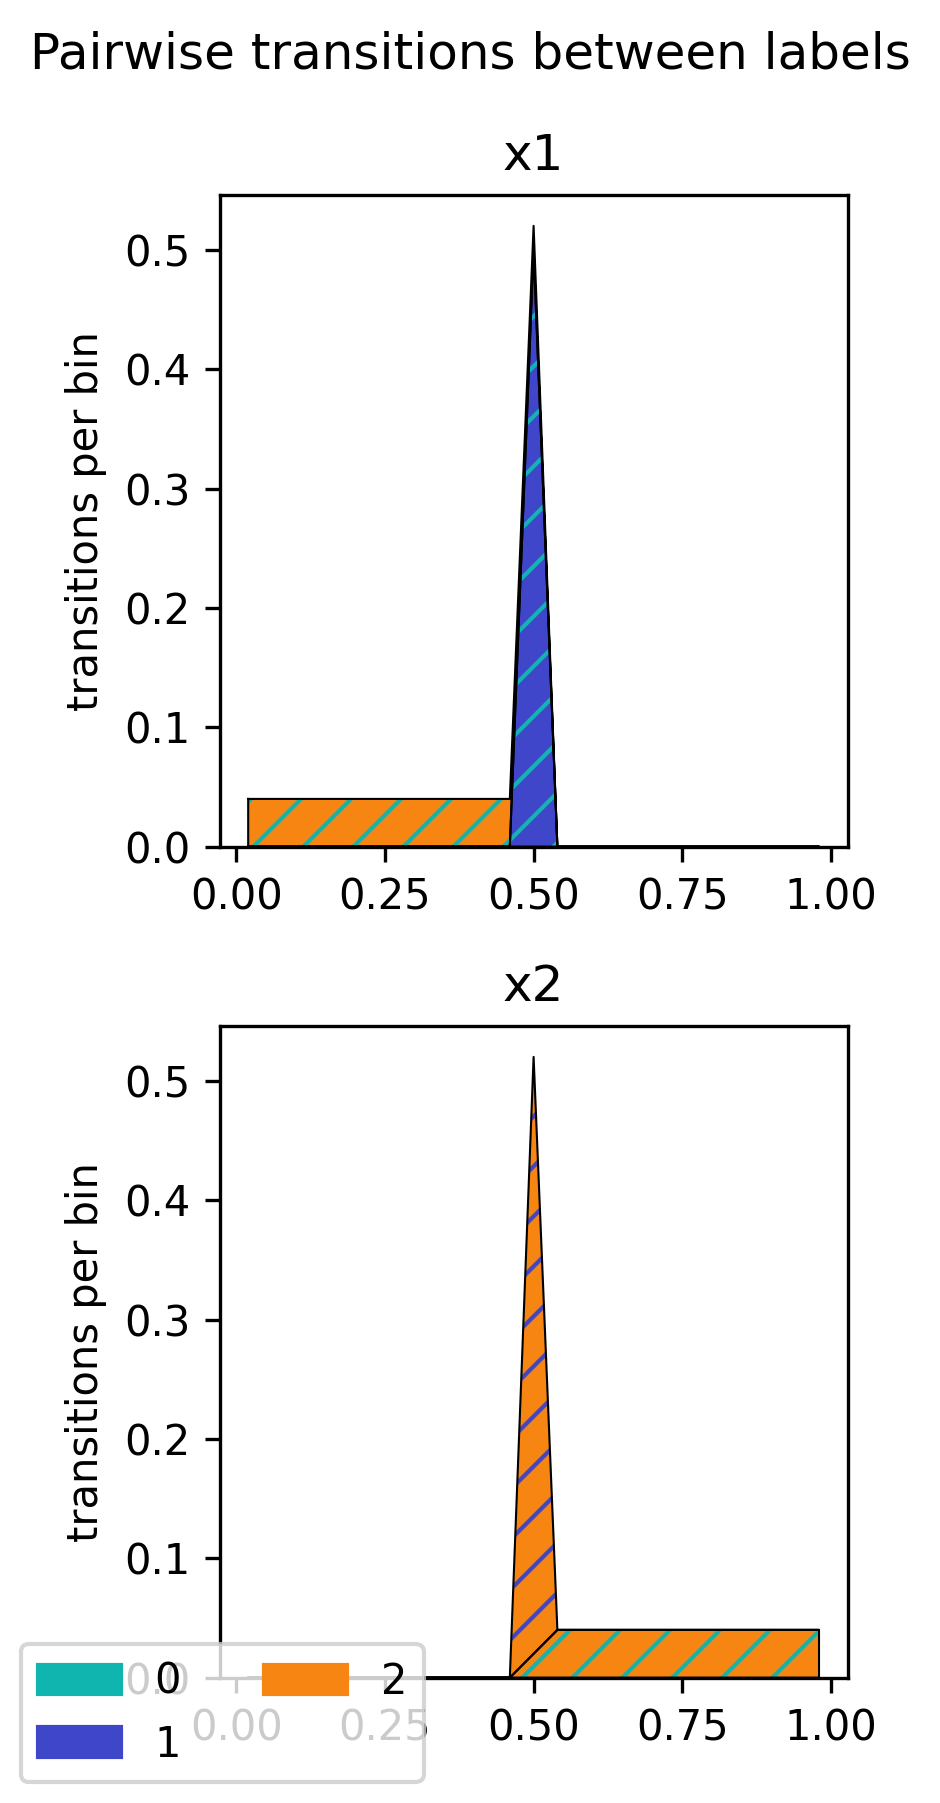

In [22]:
f = plot_sens_matrix_list(sample_points=sample_points_min_max[0], sens_matrix_list=ground_truth_sens_matrix_list, stack_plot_kwargs=dict(colors=label_colors[:3], hatch="//"), 
                          do_pairwise_labels=False, stackplot_color_hatch=True, stackplot_divider=True)

In [23]:
def compute_sens_matrix_list(n_samples: int) -> list:
    samples = np.random.random((n_samples, 2))
    labels = np.array([
        label_fn(x) for x in samples
    ])

    if len(np.unique(labels)) != 3:
        raise RuntimeError("not enough random labels")

    rv, rp = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox, return_original_ridge_point_indices=True)
    M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, rp)
    ridge_based_para_sense_preparations_result = ridge_based_para_sense_preparations(ridge_vertices=rv,
                                                                                     bandwidths=bws,
                                                                                     clip_box=aabbox,
                                                                                     step_size=None,
                                                                                     sample_points_min_max=sample_points_min_max,
                                                                                     verbose=False)
    _, dtc_ret = build_directed_transition_cubes(M_T, rv, sample_points_min_max=sample_points_min_max, 
                                                 ridge_based_para_sense_preparations_result=ridge_based_para_sense_preparations_result,
                                                 bandwidths=bws, clip_box=aabbox, step_size=None, n_proc=None, verbose=False)
    sens_matrix_list = [d[0] for d in dtc_ret]

    # reconstruct original matrx in case less labels were given

    return sens_matrix_list

In [24]:
def compute_err(l1,l2):
    return ((np.abs(l1[0] - l2[0])).sum() + (np.abs(l1[1] - l2[1])).sum()) / 2.0

In [25]:
n_samples = ((np.arange(50) + 3) ** 2).astype(int)
n_samples

array([   9,   16,   25,   36,   49,   64,   81,  100,  121,  144,  169,
        196,  225,  256,  289,  324,  361,  400,  441,  484,  529,  576,
        625,  676,  729,  784,  841,  900,  961, 1024, 1089, 1156, 1225,
       1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116,
       2209, 2304, 2401, 2500, 2601, 2704])

In [26]:
n_trials_per_n_samples = 5

In [27]:
def compute_avg_err(n_samples: int, trials: int = 3, max_fails: int = 20) -> np.ndarray:
    r = []

    i = 0
    f = 0
    while i < trials and f < max_fails:
        try:
            r_ = compute_sens_matrix_list(n_samples)
            r.append(r_)
            i += 1
        except RuntimeError as e:
            f += 1

    errs = [compute_err(v, ground_truth_sens_matrix_list) for v in r]
    return np.mean(errs)

In [28]:
compute_avg_err(100000, 2)

np.float64(0.384572095458342)

In [29]:
avg_err = np.array([compute_avg_err(n_samples[i], n_trials_per_n_samples) for i in range(len(n_samples))])

In [30]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, n_samples, avg_err)

C:\Users\bauer\AppData\Local\Temp\ipykernel_27656\1283402118.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
C:\Users\bauer\AppData\Local\Temp\ipykernel_27656\1283402118.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


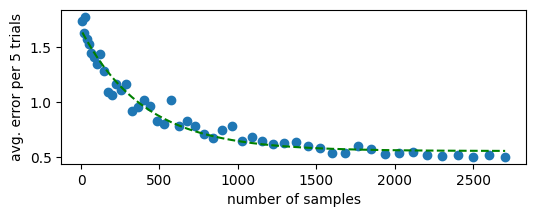

In [31]:
plt.close()
fig = plt.figure(figsize=(6, 2))
ax = fig.gca()

ax.scatter(n_samples, avg_err, label="avg error")
ax.plot(n_samples, func(n_samples, *popt), 'g--', label="curve fit")
ax.set_xlabel("number of samples")
ax.set_ylabel(f"avg. error per {n_trials_per_n_samples} trials")

plt.show()

In [32]:
sens_matrix_list[0][2, 1].sum()

np.float64(0.18209697622075535)

In [33]:
ground_truth_sens_matrix_list[0][2, 1].sum()

np.float64(0.0)